In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [5]:
y_scores_rf = rf.predict_proba(X_test)[:,1]
ap_rf = average_precision_score(y_test, y_scores_rf)
print("Random Forest PR-AUC:", ap_rf)


Random Forest PR-AUC: 0.820415842612301


In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

y_scores_lr = lr.predict_proba(X_test)[:,1]
ap_lr = average_precision_score(y_test, y_scores_lr)

print("Logistic Regression PR-AUC:", ap_lr)


Logistic Regression PR-AUC: 0.7189463752156904


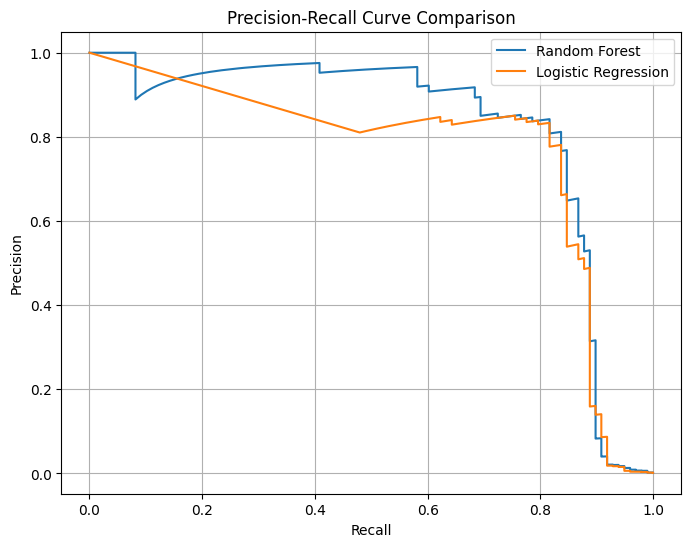

In [7]:
p_rf, r_rf, _ = precision_recall_curve(y_test, y_scores_rf)
p_lr, r_lr, _ = precision_recall_curve(y_test, y_scores_lr)

plt.figure(figsize=(8,6))
plt.plot(r_rf, p_rf, label='Random Forest')
plt.plot(r_lr, p_lr, label='Logistic Regression')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [8]:
def evaluate_threshold(scores, th):
    y_pred = (scores >= th).astype(int)
    print(f"\n====== Threshold: {th} ======")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

for th in [0.9, 0.7, 0.5, 0.3, 0.1]:
    evaluate_threshold(y_scores_rf, th)



====== Threshold: 0.9 ======
[[56858     6]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.63      0.75        98

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962


====== Threshold: 0.7 ======
[[56851    13]
 [   24    74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.76      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962


====== Threshold: 0.5 ======
[[56845    19]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98
